# 数据分析 #


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as md


### 算术平均数 ###
> np.mean(array) / array.mean()

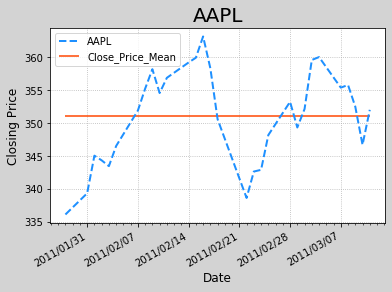

In [2]:
# 日期格式转换 day-month-year -> year-month-day
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2)

# mean value
mean = np.mean(close_price)
plt.hlines(mean,dates[0],dates[-1],label ="Close_Price_Mean",color="orangered")

plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()


### 加权平均值 ###

权重全为 1，即为算术平均数

样本 S=[s1,s2,s3...,sn]

权重 W=[w1,w2,w3...,wn]

##  加权平均值：a = $\frac{\prod_{i=1}^{n}{s_iw_i}}{\sum_{i=1}^{n}{w_i}}$




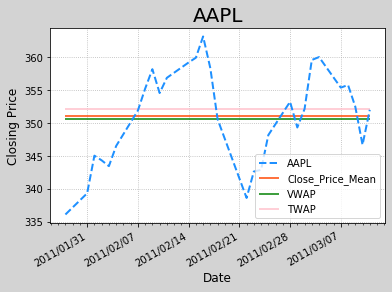

In [3]:
# VWAP - 成交量加权平均价格(成交量体现了市场对当前交易价格的认可度，成交量加权平均价格将会更接近股票的真实价格)
# TWAP - 时间加权平均价格(时间越晚权重越高，参考意义越大)

# 日期格式转换 day-month-year -> year-month-day
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

# 读取成交量volumes
dates,open_price,highest_price,lowest_price,close_price,volumes = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6,7),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2)

# mean value
mean = np.mean(close_price)
plt.hlines(mean,dates[0],dates[-1],label ="Close_Price_Mean",color="orangered")

# vwap 
vwap = np.average(close_price,weights=volumes)
plt.hlines(vwap,dates[0],dates[-1],color="green",label="VWAP")

# TWAP
times = np.linspace(1,10,close_price.size)
twap = np.average(close_price,weights=times)
plt.hlines(twap,dates[0],dates[-1],colors="pink",label="TWAP")

plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()

### 最值 ###

np.max(),np.min(),mp.ptp()极差

np.argmax(),np.argmin()最值下标

In [4]:
# 日期格式转换 day-month-year -> year-month-day
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

# 读取成交量volumes
dates,open_price,highest_price,lowest_price,close_price,volumes = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6,7),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

min_val = np.min(lowest_price)
max_val = np.max(highest_price)
print(min_val,"~",max_val)

min_val_index = np.argmin(lowest_price)
max_val_index = np.argmax(highest_price)
print(dates[min_val_index],"-",dates[max_val_index])

a = np.arange(1,10).reshape(3,3)
b = np.arange(1,10)[::-1].reshape(3,3)
print(np.maximum(a,b))# 对应位置保留比较大的数

333.53 ~ 364.9
2011-01-28 - 2011-02-16
[[9 8 7]
 [6 5 6]
 [7 8 9]]


### 中位数 ###

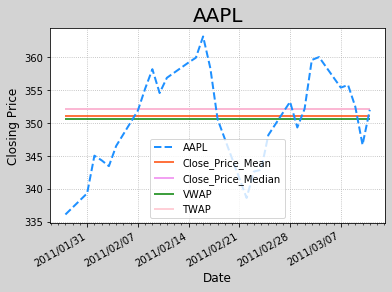

In [5]:
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

# 读取成交量volumes
dates,open_price,highest_price,lowest_price,close_price,volumes = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6,7),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2)

# mean value
mean = np.mean(close_price)
plt.hlines(mean,dates[0],dates[-1],label ="Close_Price_Mean",color="orangered")

# median
median = np.median(close_price)
plt.hlines(median,dates[0],dates[-1],label="Close_Price_Median",color="violet")

# vwap 
vwap = np.average(close_price,weights=volumes)
plt.hlines(vwap,dates[0],dates[-1],color="green",label="VWAP")

# TWAP
times = np.linspace(1,10,close_price.size)
twap = np.average(close_price,weights=times)
plt.hlines(twap,dates[0],dates[-1],colors="pink",label="TWAP")

plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()

### 标准差 ###

In [6]:


样本：S = [s1,s2,s3...sn]

平均值: m =$\frac{\sum_{1}^{n}si}{n}$

离差：D = [d1,d2,d3...dn] di = si - m

离差方：Q = [q1,q2,q3...qn] qi = $di^{2}$

总体方差：V = $\frac{\sum_{1}^{n}qi}{n}$

总体标准差：s = $\sqrt{V}$,方均根

样本方差：$v^{'}$ = $\frac{\sum_{1}^{n}qi}{n-1}$

样本标准差: $s^{'}$ = $\sqrt{v^{'}}$

SyntaxError: invalid character in identifier (<ipython-input-6-1c652de25aa8>, line 1)

In [6]:
close_price= np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(6),      # 读取的col
)
mean = np.mean(close_price)           # 算术平均值
devs = close_price - mean             # 离差
dsqs = devs ** 2                      # 离差方
pvar = np.sum(dsqs) / dsqs.size       # 总体方差
pstd = np.sqrt(pvar)                  # 总体标准差
svar = np.sum(dsqs) / (dsqs.size-1)   # 样本方差
sstd = np.sqrt(svar)                  # 样本标准差
print(pstd,sstd)

pstd = np.std(close_price)            # 总体标准差
sstd = np.std(close_price,ddof=1)     # 样本标准差  ddof=1:Delta Degrees of Freedom
print(pstd,sstd)

7.080008325481608 7.201042876260849
7.080008325481608 7.201042876260849


### 时间数据处理 ###

In [7]:
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.weekday()# 判断属于周几
	return t

# 读取成交量volumes
weekdates,open_price,highest_price,lowest_price,close_price,volumes = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6,7),      # 读取的col
    unpack=True,       # 是否拆包
    #dtype="M8[D],f8,f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)

# 计算每周几的收盘均值
ave_prices = np.zeros(5)
for i in range(ave_prices.size):
    ave_prices[i] = np.mean(close_price[weekdates==i])
print(ave_prices)


[351.79       350.635      352.13666667 350.89833333 350.02285714]


### 二维数组的轴向汇总 ###

In [8]:
ary = np.arange(1,37).reshape(6,6)
# 汇总算法
def apply(data):
    return np.mean(data),data.min(),data.max()
r = np.apply_along_axis(apply,1,ary)# 1:axis 
print(ary)
print(r)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]
[[ 3.5  1.   6. ]
 [ 9.5  7.  12. ]
 [15.5 13.  18. ]
 [21.5 19.  24. ]
 [27.5 25.  30. ]
 [33.5 31.  36. ]]


### 移动均线 ###

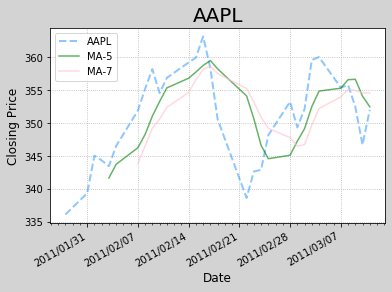

In [10]:
# 收盘价5日均线，从第五天开始，每天计算近5天的收盘价平均值所构成的一条线
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2,alpha=0.5)

# 绘制5日移动均线
ma5 = np.zeros(close_price.size-4)
for i in range(ma5.size):
    ma5[i] = close_price[i:i+5].mean()
plt.plot(dates[4:],ma5,label="MA-5",color="green",alpha=0.6)

ma7 = np.zeros(close_price.size-6)
for i in range(ma7.size):
    ma7[i] = close_price[i:i+7].mean()
plt.plot(dates[6:],ma7,label="MA-7",color="pink",alpha=0.6# 布林带 #

布林带由三条线组成

中轨：移动平均线

上轨：中轨 + 2x5日收盘价标准差 (顶部的压力)

下轨：中轨 - 2x5日收盘价标准差 (底部的支撑力)

布林带收窄代表稳定的趋势，布林带张开代表有较大的波动空间的趋势)


plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()


# 卷积 #
----

In [ ]:
a = np.arange(1,6) # 源数组
b = [8,7,6]        # 卷积核
使用b作为卷积核，对a数组进行卷积运算的过程如下：对应位置相乘再相加，空位补0 (边移动边运算)
   =>       44 65 86       => 有效卷积(valid)：每个元素都生效
   =>    23 44 65 86 59 30 => 同维卷积(same)：核心元素生效
   => 8  23 44 65 86 59 30 => 完全卷积(full)：任一元素生效 
0  0  [1  2  3  4  5]  0  0
6  7   8 <-full
   6   7  8 <-same
       6  7  8 <-valid
          6  7  8
             6  7  8
                6  7  8
                   6  7  8


In [25]:
a = np.arange(1,6) 
b = [8,7,6]       
c = np.convolve(a,b,"full")
print(c)

[ 8 23 44 65 86 59 30]


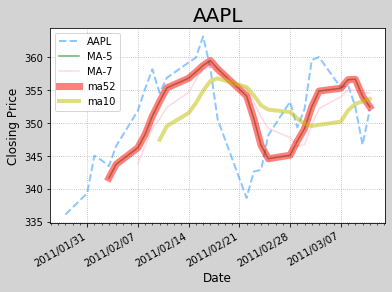

In [31]:
# 利用卷积计算5日均线 valid 
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2,alpha=0.5)

# 绘制5日移动均线
ma5 = np.zeros(close_price.size-4)
for i in range(ma5.size):
    ma5[i] = close_price[i:i+5].mean()
plt.plot(dates[4:],ma5,label="MA-5",color="green",alpha=0.6)

ma7 = np.zeros(close_price.size-6)
for i in range(ma7.size):
    ma7[i] = close_price[i:i+7].mean()
plt.plot(dates[6:],ma7,label="MA-7",color="pink",alpha=0.6)

#convolve 5
kernel = np.ones(5) / 5
ma52 = np.convolve(close_price,kernel,"valid")
plt.plot(dates[4:],ma52,color="r",alpha=0.5,label="ma52",linewidth=7)

#convolve 10
kernel_10 = np.ones(10) / 10
ma10 = np.convolve(close_price,kernel_10,"valid")
plt.plot(dates[9:],ma10,color="y",alpha=0.5,label="ma10",linewidth=4)


plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()


# 加权卷积 #
----

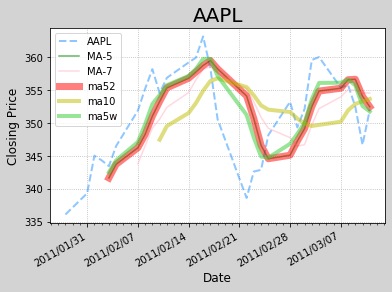

In [48]:
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)
# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2,alpha=0.5)

# 绘制5日移动均线
ma5 = np.zeros(close_price.size-4)
for i in range(ma5.size):
    ma5[i] = close_price[i:i+5].mean()
plt.plot(dates[4:],ma5,label="MA-5",color="green",alpha=0.6)

# 绘制7日移动均线
ma7 = np.zeros(close_price.size-6)
for i in range(ma7.size):
    ma7[i] = close_price[i:i+7].mean()
plt.plot(dates[6:],ma7,label="MA-7",color="pink",alpha=0.6)

#convolve 5
kernel = np.ones(5) / 5
ma52 = np.convolve(close_price,kernel,"valid")
plt.plot(dates[4:],ma52,color="r",alpha=0.5,label="ma52",linewidth=7)

#convolve 10
kernel_10 = np.ones(10) / 10
ma10 = np.convolve(close_price,kernel_10,"valid")
plt.plot(dates[9:],ma10,color="y",alpha=0.5,label="ma10",linewidth=4)

# weight convlove
x = np.linspace(-1,0,5) 
kernel_w = np.exp(x)[::-1]
# 保持卷积核再比例不变的情况下，和为1
kernel_w /= kernel_w.sum() 
ma53 = np.convolve(close_price,kernel_w,"valid")
plt.plot(dates[4:],ma53,color="limegreen",alpha=0.5,label="ma5w",linewidth=4)

plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


# 布林带 #
----
布林带由三条线组成

中轨：移动平均线

上轨：中轨 + 2x5日收盘价标准差 (顶部的压力)

下轨：中轨 - 2x5日收盘价标准差 (底部的支撑力)

布林带收窄代表稳定的趋势，布林带张开代表有较大的波动空间的趋势

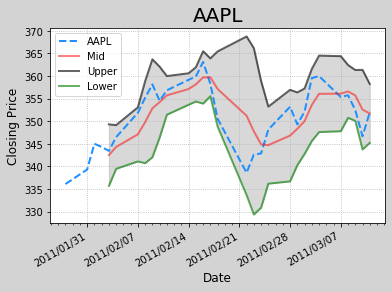

In [7]:
# 日期格式转换 day-month-year -> year-month-day
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)

ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2)


# 布林带

# weight convlove
x = np.linspace(-1,0,5) 
kernel_w = np.exp(x)[::-1]
# 保持卷积核再比例不变的情况下，和为1
kernel_w /= kernel_w.sum() 
ma5 = np.convolve(close_price,kernel_w,"valid")
plt.plot(dates[4:],ma5,color="red",alpha=0.5,label="Mid",linewidth=2)


stds = np.zeros(ma5.size)
for i in range(stds.size):
    stds[i] = close_price[i:i+5].std()

# 上轨
upper = ma5 + 2 * stds
# 下轨
lower = ma5 - 2 * stds

plt.plot(dates[4:],upper,color = "black",alpha=0.6,label="Upper",linewidth=2)
plt.plot(dates[4:],lower,color = "green",alpha=0.6,label="Lower",linewidth=2)
plt.fill_between(dates[4:],upper,lower,lower < upper,alpha=0.3,color="gray")

plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()

# 线性模型 #
----

/home/ygs/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


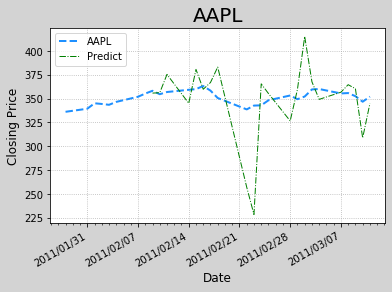

In [38]:
# 预测下一天收盘价
# 日期格式转换 day-month-year -> year-month-day
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2)

# predict next close_price
N = 4
predict_prices = np.zeros(30-N*2)
for i in range(predict_prices.size):
    A = np.zeros((N,N))
    for j in range(N):
        A[j,] = close_price[j+i:j+i+N]
    B = close_price[N+i:N*2+i]
    x = np.linalg.lstsq(A,B)[0]
    pred = B.dot(x)
    predict_prices[i] = pred

plt.plot(dates[N*2:],predict_prices,color="green",label="Predict",linestyle="-.",linewidth=1)
plt.legend()
# 使用当前窗口自动格式化x轴日期
plt.gcf().autofmt_xdate()
plt.show()


# 线性拟合 #
-----

/home/ygs/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


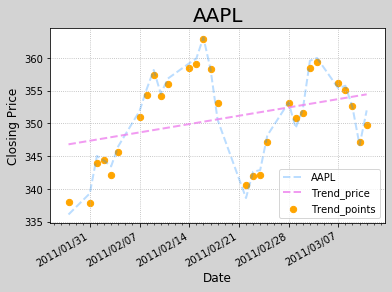

In [57]:

# Trend
# 日期格式转换 day-month-year -> year-month-day
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", # 文件位置
    delimiter=",",      # 数据分隔符 ,
    usecols=(1,3,4,5,6),      # 读取的col
    unpack=True,       # 是否拆包
    dtype="M8[D],f8,f8,f8,f8",     # 指定每一列的返回值类型
    converters={1:dmy2ymd} # 转换器函数字典 将列1格式dmy转换为ymd 
)

# 绘制收盘价折线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.grid(linestyle=":")

# 日期类型的转换 避免x轴文本的异常显示s
dates = dates.astype(md.datetime.datetime)
# 获取当前坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器，每周一显示刻度文本
#设置次刻度定位器为日定位器
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,close_price,color="dodgerblue",label="AAPL",linestyle="--",linewidth=2,alpha =0.3)

# 求每一天的趋势价格
trend_price = (highest_price + lowest_price + close_price) / 3
plt.scatter(dates,trend_price,marker="o",s=40,color="orange",label="Trend_points")

# 拟合趋势线
days = dates.astype("M8[D]").astype("int32")# 将日期转换为整数
A = np.column_stack((days,np.ones_like(days)))
B = trend_price
x = np.linalg.lstsq(A,B)[0]
trend_y = x[0] * days + x[1]

plt.plot(dates,trend_y,color = "violet",label="Trend_price",linestyle="--",linewidth=2,alpha = 0.8)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


# 协方差 #
-----
协方差：通过两组统计数据计算而得的协方差可以评估这两组统计数据的相似程度 cov_ab = ave(dev_a * dev_b):dev_x离差(ai - ave_a)
# 相关系数 #

协方差 除去 两组统计样本标准差的乘积是一个[-1，1]的数，即为相关系数

越接近0，两组样本越不相关，越接近1，越正相关，越接近-1，越负相关

# 相关矩阵 #
$$
\left[ \begin{array}{c}
\frac{var\_a}{std\_a \times std\_a} & \frac{cov\_ab}{std\_a \times std\_b} \\
\frac{cov\_ba}{std\_b \times std\_a} & \frac{var\_b}{std\_b \times std\_b}\\
\end{array} 
\right ]
$$
矩阵正对角线上的值都为1。（同组样本自己相比绝对正相关）
$$
\left[ \begin{array}{ccc}
1 & \frac{cov\_ab}{std\_a \times std\_b} \\
\frac{cov\_ba}{std\_b \times std\_a} & 1\\
\end{array} 
\right ]
$$



cov_vale_bhp 3.135577333333333
0.8664988296368299
[[1.         0.86649883]
 [0.86649883 1.        ]]
[[8.53844379 3.24370069]
 [3.24370069 1.64122023]]


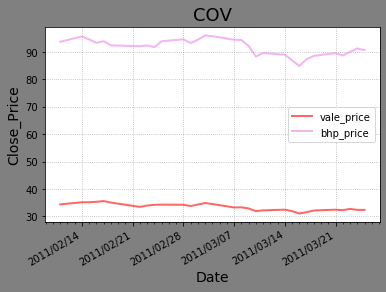

In [79]:
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,bhp_close_price = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/bhp.csv",delimiter=",",usecols=(1,6),dtype="M8[D],f8",
unpack=True,converters={1:dmy2ymd})

vale_close_price = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/vale.csv",delimiter=",",usecols=(6,),dtype="f8",
unpack=True)


plt.figure("COV",facecolor="gray")
plt.title("COV",fontsize=18)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close_Price",fontsize=14)
plt.grid(linestyle=":")


dates = dates.astype(md.datetime.datetime)
ax = plt.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.plot(dates,vale_close_price,color="red",label="vale_price",linewidth=2,alpha=0.6)
plt.plot(dates,bhp_close_price,color="violet",label="bhp_price",linewidth=2,alpha=0.6)

# 计算协方差
mean_vale = np.mean(vale_close_price)
mean_bhp = np.mean(bhp_close_price)
dev_vale = vale_close_price - mean_vale
dev_bhp = bhp_close_price - mean_bhp
cov_vale_bhp = np.mean(dev_vale * dev_bhp)
print("cov_vale_bhp",cov_vale_bhp)

# 相关系数
coef = cov_vale_bhp / (np.std(vale_close_price) * np.std(bhp_close_price))
print(coef)

# 相关矩阵
coef_matrix = np.corrcoef(vale_close_price,bhp_close_price)
print(coef_matrix)

# 协方差矩阵
print(np.cov(bhp_close_price,vale_close_price))


plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# 多项式拟合 #
----
相关API

根据拟合系数与自变量求出拟合值，由此可得拟合曲线坐标样本数据 [x,y'] |  np.polyval(P,X) -> Y'

多项式函数求导，根据拟合系数求出多项式函数导数的系数 | np.polyder(P) -> Q

已知多项式系数Q，求多项式函数的根 | xs = np.roots(Q)

两个多项式函数的差函数的系数(可以通过差函数的根求取两个曲线的交点) | Q = np.polysub(P1,P2)

### 求 y = 4x^3 + 3x^2 - 1000x +1 曲线的拐点坐标

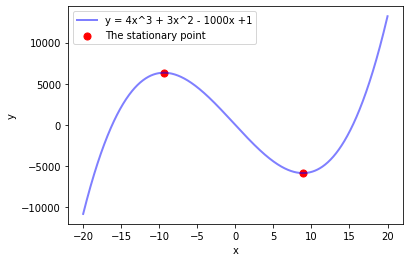

In [7]:

fig,ax = plt.subplots()
P = [4,3,-1000,1]
x = np.linspace(-20,20,1000)
y = np.polyval(P,x)
plt.plot(x,y,color="blue",linewidth=2,alpha=0.5,label="y = 4x^3 + 3x^2 - 1000x +1")

# 求驻点
Q = np.polyder(P)
xs = np.roots(Q)
ys = np.polyval(P,xs)
plt.scatter(xs,ys,marker="o",color="red",s=50,label="The stationary point")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### 使用多项式拟合两只股票bhp、vale的差价函数

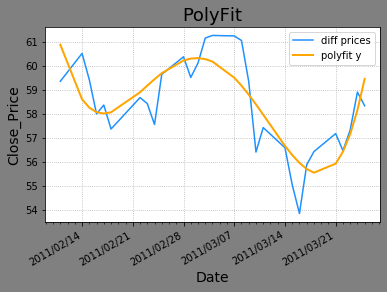

In [10]:
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,bhp_close_price = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/bhp.csv",delimiter=",",usecols=(1,6),dtype="M8[D],f8",
unpack=True,converters={1:dmy2ymd})

vale_close_price = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/vale.csv",delimiter=",",usecols=(6,),dtype="f8",
unpack=True)


plt.figure("PolyFit",facecolor="gray")
plt.title("PolyFit",fontsize=18)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close_Price",fontsize=14)
plt.grid(linestyle=":")


dates = dates.astype(md.datetime.datetime)
ax = plt.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())

# 绘制差价函数
diff_prices = bhp_close_price - vale_close_price
plt.plot(dates,diff_prices,color="dodgerblue",label="diff prices")

# 拟合差价函数
days = dates.astype("M8[D]").astype("int32")
P = np.polyfit(days,diff_prices,4)# P 多项式参数
poly_prices = np.polyval(P,days)# 由方程和x确定拟合后的y
plt.plot(dates,poly_prices,color="orange",label="polyfit y",linewidth=2)

plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# 数据平滑 #
----
数据平滑处理通常包含降噪、拟合等操作

['2011-03-22' '2011-03-10' '2011-02-20']


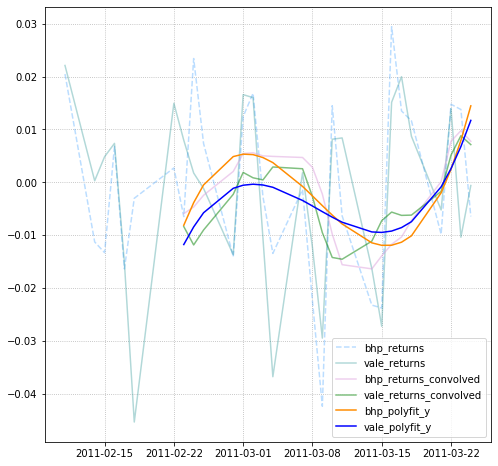

In [56]:
# 使用卷积完成数据降噪
# 绘制两只股票收益率曲线，收益率=(后一天收盘价-前一天收盘价) / 前一天收盘价
plt.figure(figsize=(8,8))
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,bhp_close_price = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/bhp.csv",delimiter=",",usecols=(1,6),dtype="M8[D],f8",
unpack=True,converters={1:dmy2ymd})
vale_close_price = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/vale.csv",delimiter=",",usecols=(6,),dtype="f8",
unpack=True)

# 计算二者收益率
bhp_returns = np.diff(bhp_close_price) / bhp_close_price[:-1] # 返回后一项减前一项的arrray
vale_returns = np.diff(vale_close_price) / vale_close_price[:-1]
dates = dates[:-1]

# 绘制二者收益线
plt.plot(dates,bhp_returns,color="dodgerblue",alpha=0.3,linestyle='--',label="bhp_returns",)
plt.plot(dates,vale_returns,color="teal",alpha=0.3,linestyle="-",label="vale_returns")

# 绘制卷积降噪曲线
convolve_core = np.hanning(8)
convolve_core /= convlove_core.sum()
bhp_returns_convolved = np.convolve(bhp_returns,convolve_core,"valid")
vale_returns_convolved = np.convolve(vale_returns,convolve_core,"valid")

plt.plot(dates[7:],bhp_returns_convolved,color="plum",                                      label="bhp_returns_convolved",alpha=0.5)
plt.plot(dates[7:],vale_returns_convolved,color="green",
         label="vale_returns_convolved",alpha=0.5)

# 多项式拟合
days = dates.astype("M8[D]").astype("int32")
bhp_p = np.polyfit(days[7:],bhp_returns_convolved,3)
bhp_polyfit_y = np.polyval(bhp_p,days[7:])
vale_p = np.polyfit(days[7:],vale_returns_convolved,3)
vale_polyfit_y = np.polyval(vale_p,days[7:])

plt.plot(dates[7:],bhp_polyfit_y,color="darkorange",label="bhp_polyfit_y",alpha=1)
plt.plot(dates[7:],vale_polyfit_y,color="blue",label="vale_polyfit_y",alpha=1)

# 求拟合后的交点
diff_p = np.polysub(bhp_p,vale_p)
root_xs = np.roots(diff_p)
print(root_xs.astype("M8[D]"))

plt.grid(linestyle=":")
plt.legend()
plt.show()

# 符号数组 #
----

The `sign` function returns ``-1 if x < 0, 0 if x==0, 1 if x > 0``.  

净额成交量(OBV)：若相比上一天的收盘价上涨，则为正成交量，反之为负成交量

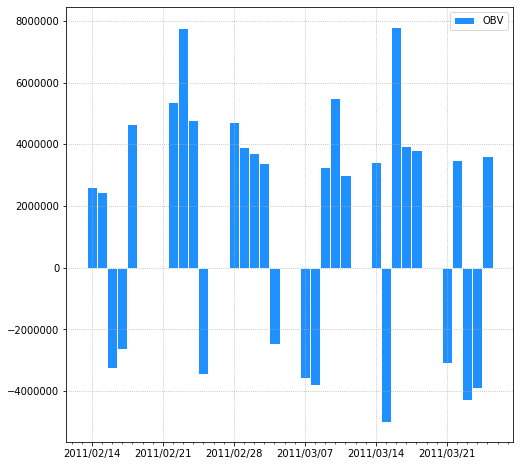

In [67]:
plt.figure(figsize=(8,8))
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,bhp_close_price,volumes = np.loadtxt("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/bhp.csv",delimiter=",",usecols=(1,6,7),dtype="M8[D],f8,f8",
unpack=True,converters={1:dmy2ymd})


diff_close_price = np.diff(close_price)
sign_close_price = np.sign(diff_close_price)
obvs = volumes[1:] * sign_close_price

ax = plt.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())
dates = dates[1:].astype(md.datetime.datetime)

plt.tick_params(labelsize=10)
plt.bar(dates,obvs,1.0,color="dodgerblue",edgecolor="white",label="OBV")

plt.grid(linestyle=":")
plt.legend()
plt.show()

# 数组处理函数 #
----

np.piecewise(源数组，条件序列，取值序列)

针对源数组中的每一个元素，检测其是否符合条件序列中的每一个条件，符合哪一个条件就用取值序列汇总对应的值表示该元素，放到目标数组中

In [78]:
a = np.array([70,80,60,30,40])
d = np.piecewise(
    a,
    [a<60,a==60,a>60],
    [-1,0,1]
)
print("np.sign(a):",np.sign(a))
print("a: ",a,"\n""d :",d)

np.sign(a): [1 1 1 1 1]
a:  [70 80 60 30 40] 
d : [ 1  1  0 -1 -1]


# 矢量化 #
----
用数组代替标量来操作数组中的每个元素

In [155]:
import math

def foo(x,y):
    return math.sqrt(x**2 + y**2)

# vectorize
xx,yy = np.array([3,4,5]),np.array([4,5,6])
print(np.vectorize(foo)(xx,yy),np.vectorize(foo)(xx,yy).dtype)

# frompyfunc
foo_func = np.frompyfunc(foo,2,1)
print(foo_func(xx,yy),foo_func(xx,yy).dtype)


[5.         6.40312424 7.81024968] float64
[5.0 6.4031242374328485 7.810249675906654] object


-0.004450855193434342


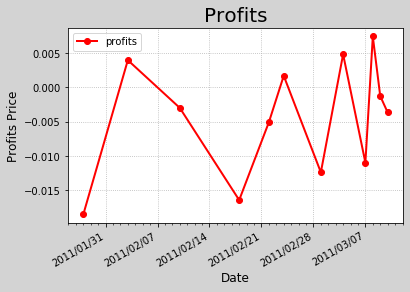

In [7]:
# 定义一种买进卖出策略，通过历史数据判断是否值得实施
def dmy2ymd(dmy):
	dmy = str(dmy, encoding='utf-8')
	time = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
	t = time.strftime('%Y-%m-%d')
	return t

dates,open_price,highest_price,lowest_price,close_price = np.loadtxt(
    "/home/ygs/DataScience/da_data/aapl.csv", 
    delimiter=",",     
    usecols=(1,3,4,5,6),      
    unpack=True,      
    dtype="M8[D],f8,f8,f8,f8",     
    converters={1:dmy2ymd} 
)

# 定义买入卖出策略，计算当天收益率
def profit(open,high,low,close):
    buy_price = open * 0.995
    if  (buy_price > low and buy_price < high):# 可以买
        return (close - buy_price) / buy_price # 返回当天收益率
    else:
        return np.nan

# 矢量化profit函数，求得30天的收益率
profits = np.vectorize(profit)(open_price,highest_price,lowest_price,close_price)
dates = dates.astype(md.datetime.datetime)

isnan_mask = np.isnan(profits)# 找出为nan的位置
dates = dates[~isnan_mask] # 非nan的日期
profits = profits[~isnan_mask] # 非nan的收益


plt.figure("Profits",facecolor="lightgray")
plt.title("Profits",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Profits Price",fontsize=12)
plt.grid(linestyle=":")

ax = plt.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%Y/%m/%d"))
ax.xaxis.set_minor_locator(md.DayLocator())


# print(dates,"\n",profits)
plt.plot(dates,profits,"o-",color="red",label="profits",linewidth=2)
print(profits.mean())# 查看均值
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# 矩阵 #

In [19]:
ary = np.arange(1,10).reshape(3,3)
print(ary,ary.shape,type(ary))

# method 1
m = np.matrix(ary,copy=True) # 数据不共享
print(m,m.shape,type(m))

# method 2
m2 = np.mat(ary) # 数据共享
print(m2,m2.shape,type(m2))

# method 3
m3 = np.mat("1 2 3; 4 5 6")
print(m3,m3.dtype,m3.shape,type(m3))

# 矩阵乘法运算
print("ary * ary : ""\n",ary * ary)
print("m * m : ""\n",m * m)

# 矩阵求逆
m = np.mat("1 2 3; 7 8 8;2 3 5")
print(m.I)
print(m * m.I)



[[1 2 3]
 [4 5 6]
 [7 8 9]] (3, 3) <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]
 [7 8 9]] (3, 3) <class 'numpy.matrix'>
[[1 2 3]
 [4 5 6]
 [7 8 9]] (3, 3) <class 'numpy.matrix'>
[[1 2 3]
 [4 5 6]] int64 (2, 3) <class 'numpy.matrix'>
ary * ary : 
 [[ 1  4  9]
 [16 25 36]
 [49 64 81]]
m * m : 
 [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[-2.28571429  0.14285714  1.14285714]
 [ 2.71428571  0.14285714 -1.85714286]
 [-0.71428571 -0.14285714  0.85714286]]
[[ 1.00000000e+00  0.00000000e+00  1.11022302e-16]
 [ 8.88178420e-16  1.00000000e+00  8.88178420e-16]
 [ 5.55111512e-16 -5.55111512e-17  1.00000000e+00]]


In [25]:
# 一帮孩子和家长除去旅游，去乘坐的是bus，小孩票价为3元，家长票价为3.2y元，共花了118.4元，
# 回坐的是train，小孩票价是3.5元，家长票价为3.6元,共135.2元，分别求人数
m = np.mat("3 3.2;3.5 3.6")
b = np.mat("118.4;135.2")
persons = m.I * b
x = np.linalg.lstsq(m,b)[0]
x2 = np.linalg.solve(m,b)
print(persons)
print(x)
print(x2)

[[16.]
 [22.]]
[[16.]
 [22.]]
[[16.]
 [22.]]
/home/ygs/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


# 通用函数 #
----

In [7]:
# fibonacci
n = 35
F = np.mat("1 1;1 0")
# for i in  range(1,n):
#     print("i=",i,"-> fiboncci=",(F**i)[0,0])

# 数组的裁剪 将数组中小于和大于下限和上限的元素替换为下限和上限，返回裁剪后的数组
a = np.random.randint(1,10,10)
print("a:",a)`
a.clip(min=3,max=10)

# 数组的压缩 返回由调用数组中满足条件的元素组成的新数组
b = np.random.randint(1,10,10)
print("b:",b)
print("b.compress(b > 5)",b.compress(b > 5))
print("b[b > 5]",b[b > 5])
mask = np.all([a>5,a<7],axis=0)# 即大于3，右小于7
print(b[mask])



a: [5 7 7 2 4 9 4 1 1 6]
b: [7 2 6 7 2 2 1 2 6 4]
b.compress(b > 5) [7 6 7 6]
b[b > 5] [7 6 7 6]
[4]


## 加法与乘法

In [15]:
a = np.arange(1,10)
print(a)
print(np.add(a,a))
print(np.add.reduce(a))
print(np.add.accumulate(a))

print(a.prod())
print(a.cumprod())

print("外和：",np.add.outer([10,20,30],a))
print("外积：",np.outer([10,20,30],a))

[1 2 3 4 5 6 7 8 9]
[ 2  4  6  8 10 12 14 16 18]
45
[ 1  3  6 10 15 21 28 36 45]
362880
[     1      2      6     24    120    720   5040  40320 362880]
外和： [[11 12 13 14 15 16 17 18 19]
 [21 22 23 24 25 26 27 28 29]
 [31 32 33 34 35 36 37 38 39]]
外积： [[ 10  20  30  40  50  60  70  80  90]
 [ 20  40  60  80 100 120 140 160 180]
 [ 30  60  90 120 150 180 210 240 270]]


## 除法

np.true_divide(a,b) a 真除 b (对应位置相除)

np.divide(a,b) a 真除 b

np.floor_divide(a,b) 真除结果向下取整

np.floor(a / b)

np.ceil(a / b)  真除结果向上取整 

np.trunc(a / b) a  截断除 b (干掉小数部分)

np.round(a / b) 四舍五入取整

In [21]:
a = np.array([20,20,-20,-20])
b = np.array([3,-3,6,-6])

# 真除
c = np.true_divide(a,b)
c = np.divide(a,b)
c = a / b
print("array:",c) 

d = np.floor(a / b)
print("floor_divide:",d)

e = np.ceil(a / b)
print("ceil:",e)

f = np.trunc(a / b)
print("trunc:",f)

g = np.round(a /  b)
print("round",g)

array: [ 6.66666667 -6.66666667 -3.33333333  3.33333333]
floor_divide: [ 6. -7. -4.  3.]
ceil: [ 7. -6. -3.  4.]
trunc: [ 6. -6. -3.  3.]
round [ 7. -7. -3.  3.]


## 位运算符


### xor

In [25]:
a = np.array([0,-1,2,-3,4,-5])
b = np.array([0,1,2,3,4,5])
print(a,b)
c = a ^ b
print(c)
e  = a.__xor__(b)
print(e)
f = np.bitwise_xor(a,b)
print(f)
print(np.where(f<0))

[ 0 -1  2 -3  4 -5] [0 1 2 3 4 5]
[ 0 -2  0 -2  0 -2]
[ 0 -2  0 -2  0 -2]
[ 0 -2  0 -2  0 -2]
(array([1, 3, 5]),)


### and

In [29]:
a = np.array([0,-1,2,-3,4,-5])
b = np.array([0,1,2,3,4,5])

c = a & b
print(c)

d = a.__and__(b)
print(d)

e = np.bitwise_and(a,b)
print(e)

[0 1 2 1 4 1]
[0 1 2 1 4 1]
[0 1 2 1 4 1]


## 三角函数
----

### 傅里叶定理 
#### 任何一条周期曲线，无论多么跳跃或者不规则，都能表示成一组光滑正弦曲线叠加之和

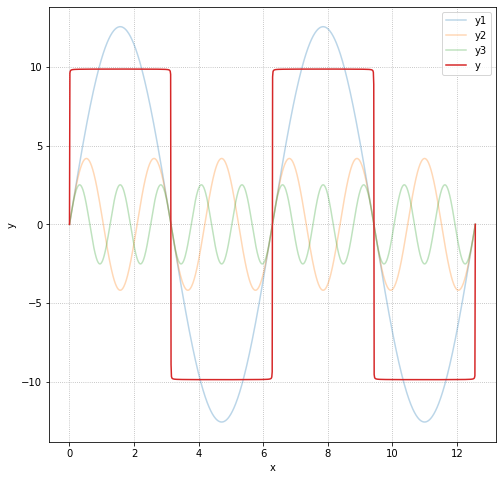

In [46]:
# 合成方波
plt.figure(figsize=(8,8))
x = np.linspace(0,np.pi*4,1000)

y1 = 4 * np.pi * np.sin(x)
y2 = 4/3 * np.pi * np.sin(3*x)
y3 = 4/5 * np.pi * np.sin(5*x)

# 叠加1000条曲线
n = 1000
y = np.zeros(n)
for i in range(1,n+1):
    y += 4/(2*i-1) * np.pi * np.sin((2*i-1)*x)

plt.grid(linestyle=":")
plt.plot(x,y1,label="y1",alpha=0.3)
plt.plot(x,y2,label="y2",alpha=0.3)
plt.plot(x,y3,label="y3",alpha=0.3)
plt.plot(x,y,label="y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## 特征值和特征向量 ##
----

已知n阶方阵A,求特征值和特征向量

eigvals：特征值数组 eigvecs:特征向量数组

eigvals,eigvecs = np.linalg.eig(A)

已知特征值和特征向量，求方阵

S = eigvecs * np.mat(np.diag(eigvals)) * np.mat(eigvecs^-1)

In [59]:
A = np.mat("3 4 6;2 3 -1;5 7 11")
print(A)
# 提取特征值
eigvals,eigvecs = np.linalg.eig(A)
print(eigvals,"\n",eigvecs)

# 求原方阵
B = eigvecs * np.diag(eigvals) * eigvecs.I
print(B)

[[ 3  4  6]
 [ 2  3 -1]
 [ 5  7 11]]
[13.8556546  0.1443454  3.       ] 
 [[ 0.48628397  0.81808984  0.26726124]
 [ 0.00910259 -0.57505923 -0.80178373]
 [ 0.87375342 -0.00599085  0.53452248]]
[[ 3.  4.  6.]
 [ 2.  3. -1.]
 [ 5.  7. 11.]]


(512, 512, 3)


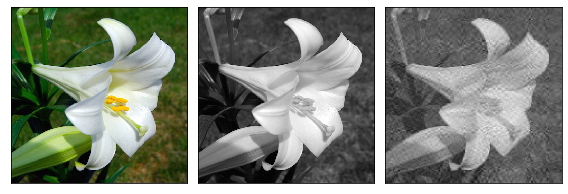

In [81]:
import imageio # 替换scipy.misc.imread()
plt.figure(figsize=(8,8))


original = imageio.imread("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/lily.jpg")
original_gray = imageio.imread("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/lily.jpg",as_gray=True)


# 提取特征值和特征向量
original_gray = np.mat(original_gray)
eigvals,eigvecs = np.linalg.eig(original_gray)

# 抹去一部分特征值
eigvals[50:] = 0
new_image_1 = eigvecs * np.diag(eigvals) * eigvecs.I

plt.subplot(131)
plt.imshow(original)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.subplot(132)
plt.imshow(original_gray,cmap="gray")
plt.xticks([])
plt.yticks([])
plt.subplot(133)

plt.imshow(new_image_1.real,cmap="gray")
plt.xticks([])
plt.yticks([])

plt.show()

# 奇异值分解(Singular Value Decomposition:SVD) #
----

有一个矩阵M，可以分解为3个矩阵U、S、V，使得UxSxV等于M。U与V都是正交矩阵，那么S矩阵主对角线上的元素称为矩阵M的奇异值

In [106]:
M = np.mat("4 11 14;8 7 -2")
print(M,"\n")
u,sv,v = np.linalg.svd(M,full_matrices=False)# full_matrices：使结果不完整，返回方阵
print("u * u.T",u * u.T,"\n")
print("v * v.T",v * v.T,"\n")
print("sv",sv,"\n")
S = np.diag(sv)
print("S",S,"\n")
print(u.dot(np.diag(sv)).dot(v))

sv[1:]=0
print(u.dot(np.diag(sv)).dot(v))

[[ 4 11 14]
 [ 8  7 -2]] 

u * u.T [[1.0000000e+00 3.2123061e-17]
 [3.2123061e-17 1.0000000e+00]] 

v * v.T [[ 1.00000000e+00 -6.16790569e-18]
 [-6.16790569e-18  1.00000000e+00]] 

sv [18.97366596  9.48683298] 

S [[18.97366596  0.        ]
 [ 0.          9.48683298]] 

[[ 4. 11. 14.]
 [ 8.  7. -2.]]
[[ 6. 12. 12.]
 [ 2.  4.  4.]]


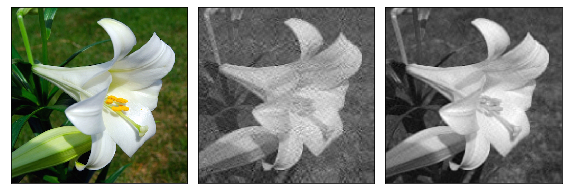

In [125]:
import imageio # 替换scipy.misc.imread()
plt.figure(figsize=(8,8))


original = imageio.imread("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/lily.jpg")
original_gray = imageio.imread("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/lily.jpg",as_gray=True)


# 提取特征值和特征向量
original_gray = np.mat(original_gray)
eigvals,eigvecs = np.linalg.eig(original_gray)

# 抹去一部分特征值
eigvals[50:] = 0
new_image_1 = eigvecs * np.diag(eigvals) * eigvecs.I

plt.subplot(131)
plt.imshow(original)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.subplot(132)
plt.imshow(new_image_1.real,cmap="gray")
plt.xticks([])
plt.yticks([])

# SVD
u,sv,v = np.linalg.svd(np.mat(original_gray),full_matrices=False)
sv[50:]=0
M = u.dot(np.diag(sv).dot(v))
plt.subplot(133)
plt.imshow(M.real,cmap="gray")
plt.xticks([])
plt.yticks([])

plt.show()

# 快速傅里叶变换(Fast Fourier Transform:FFT)
----
导入快速傅里叶变换所需模块

```
import numpy.fft as nf
```

通过采样数与采样周期求得傅里叶变换分解所得曲线的**频率序列**

```python
freqs = np.fft.fftfreq(采样数量, 采样周期)
```

通过原函数值的序列j经过快速傅里叶变换得到一个**复数数组**，复数的模代表的是**振幅**，复数的辐角代表**初相位**

```python
np.fft.fft(原函数数组) -> 复数数组(表示一组正弦函数)
```

通过 **复数数组** 经过逆向傅里叶变换得到**合成的函数值数组**

```python
np.fft.ifft(复数数组)->原函数值数组

```


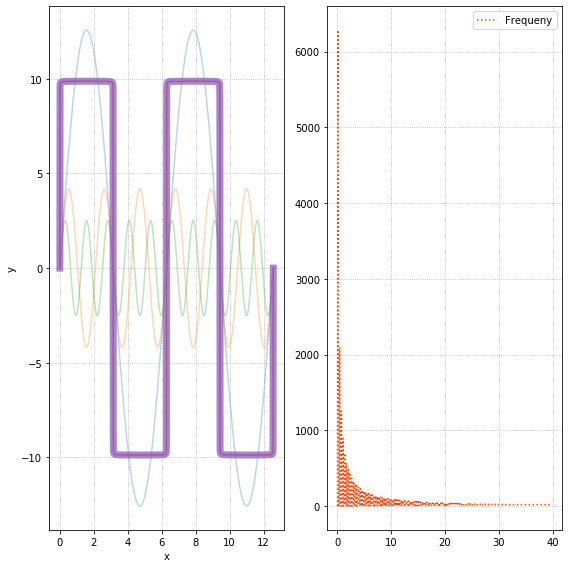

In [15]:
# 针对合成波坐FFT，得到一组复数序列，针对
# 合成方波
plt.figure(figsize=(8,8))
x = np.linspace(0,np.pi*4,1000)

y1 = 4 * np.pi * np.sin(x)
y2 = 4/3 * np.pi * np.sin(3*x)
y3 = 4/5 * np.pi * np.sin(5*x)

# 叠加1000条曲线
n = 1000
y = np.zeros(n)
for i in range(1,n+1):
    y += 4/(2*i-1) * np.pi * np.sin((2*i-1)*x)

plt.subplot(121)
plt.grid(linestyle=":")
plt.plot(x,y1,label="y1",alpha=0.3)
plt.plot(x,y2,label="y2",alpha=0.3)
plt.plot(x,y3,label="y3",alpha=0.3)
plt.plot(x,y,label="y")
plt.xlabel("x")
plt.ylabel("y")

# FFT
import numpy.fft as nf
complex_ary = nf.fft(y)
y_ = nf.ifft(complex_ary).real # 逆向fft后的合成波
plt.plot(x,y_,label="y_",alpha=0.8,linewidth=7)
plt.tight_layout()

# 绘制频域图 频率-能量图
freqs = nf.fftfreq(y_.size,x[1]-x[0])# 通过采样数量和采样周期获取频率数组
pows = np.abs(complex_ary)# 求能量值
plt.subplot(122)
plt.grid(linestyle=":")
plt.plot(freqs[freqs>0],pows[freqs>0],label="Frequeny",linestyle=":",color="orangered")
plt.tight_layout()
plt.legend()
plt.show()

## 频域滤波降噪
----


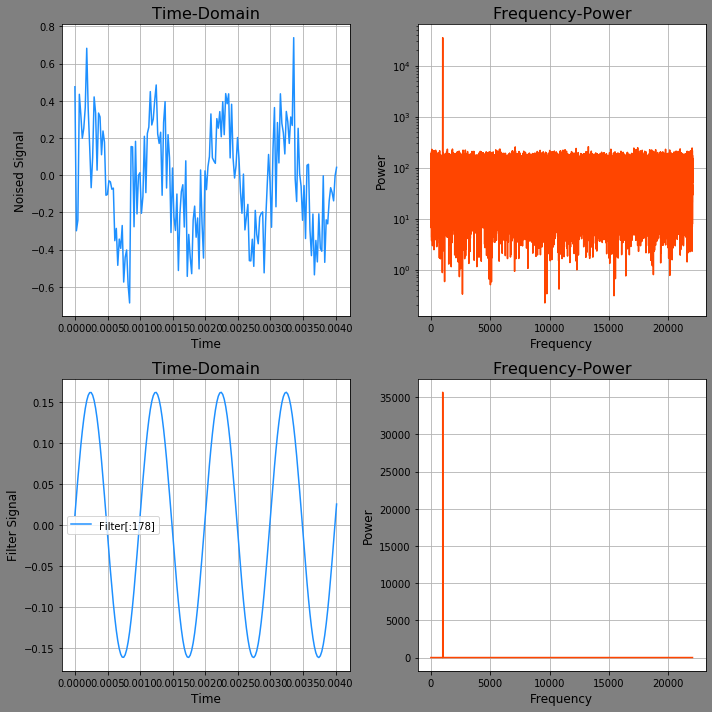

In [16]:
import scipy.io.wavfile as wf
# Step1：读取音频文件，获取基本信息：采样个数，采样周期，与每个采样的声音信号值，绘制 音频域：时间：位移图像

# 采样率(每秒采样点的个数)     采样位移
sample_rate,noised_sigs = wf.read("/home/ygs/DataScience/da_data/noised.wav")
# print(sample_rate,noised_sigs.shape)

# 绘制音频时域图像:时间/位移
times = np.arange(noised_sigs.size) / sample_rate

plt.figure("Filter",facecolor="gray",figsize=(10,10))
plt.subplot(221)
plt.title("Time-Domain",fontsize=16)
plt.ylabel("Noised Signal",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.grid(":")
plt.plot(times[:178],(noised_sigs/(2**15))[:178],color="dodgerblue",label="noised[:178]")

# Step2：基于傅里叶变化，获取音频频域信息
freqs = nf.fftfreq(times.size,times[1]-times[0])#采样数量，采样频率 => 获得频率
complex_ary = nf.fft(noised_sigs)
power = np.abs(complex_ary)#获得能量

# 绘制音频频域的：频率/能量图像 
plt.subplot(222)
plt.title("Frequency-Power",fontsize=16)
plt.ylabel("Power",fontsize=12)
plt.xlabel("Frequency",fontsize=12)
plt.grid(":")
plt.semilogy(freqs[freqs>0],power[freqs>0]/(2**15),color="orangered",label="Noised")

# Step3:将低能噪声去除后绘制音频频域的：频率/能量图像

# 找到能量最大的频率
fund_freq = freqs[power.argmax()]
# 找到不等的其他位置
noised_index = np.where(freqs != fund_freq) 
# 将噪声位置的复数数据干掉
complex_ary[noised_index] = 0
new_power = np.abs(complex_ary)

plt.subplot(224)
plt.title("Frequency-Power",fontsize=16)
plt.ylabel("Power",fontsize=12)
plt.xlabel("Frequency",fontsize=12)
plt.grid(":")
plt.plot(freqs[freqs>0],new_power[freqs>0]/(2**15),color="orangered",label="Filter")

# Step4:针对滤波后的复数数组，进行IFFT
filter_sigs = nf.ifft(complex_ary).real
# 绘制时域图像 时间：位移图像
plt.subplot(223)
plt.title("Time-Domain",fontsize=16)
plt.ylabel("Filter Signal",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.grid(":")
plt.plot(times[:178],(filter_sigs/(2**15))[:178],color="dodgerblue",label="Filter[:178]")

# Step5:保存音频文件
wf.write("/home/ygs/DataScience/da_data/filter.wav",sample_rate,(filter_sigs).astype(np.int16))


plt.legend()
plt.tight_layout()
plt.show()

# 随机数模块 #
----

#### 二项分布（binomial）

二项分布就是重复n次独立事件的伯努利试验。在每次试验中只有两种可能的结果，而且两种结果发生与否互相对立，并且相互独立，事件发生与否的概率在每一次独立试验中都保持不变。

```python
# 产生size个随机数，每个随机数来自n次尝试中的成功次数，其中每次尝试成功的概率为p。
np.random.binomial(n, p, size)

```

二项分布可以用于求如下场景的概率的近似值：

1. 某人投篮命中率为0.3，投10次，进5个球的概率。

```python
sum(np.random.binomial(10, 0.3, 200000) == 5) / 200000

```

2. 某人打客服电话，客服接通率是0.6，一共打了3次，都没人接的概率。

```python
sum(np.random.binomial(3, 0.6, 200000) == 0) / 200000

```




In [31]:
# 投n次，命中率为0.3，求进每个球的概率
a = np.random.binomial(10,0.3,10000)
for i in range(11):
    print("Pi=",i,(a==i).sum()/10000)

Pi= 0 0.027
Pi= 1 0.1238
Pi= 2 0.2321
Pi= 3 0.2685
Pi= 4 0.1975
Pi= 5 0.1028
Pi= 6 0.0374
Pi= 7 0.0097
Pi= 8 0.0012
Pi= 9 0.0
Pi= 10 0.0


### 超几何分布(hypergeometric)
```python
# 产生size个随机数，每个随机数t为在总样本中随机抽取nsample个样本后好样本的个数，总样本由ngood个好样本和nbad个坏样本组成
np.random.hypergeometric(ngood, nbad, nsample, size)

```

In [33]:
-# 7:good 3:bad select 3
a = np.random.hypergeometric(7,3,3,10000)
print("P(a==0)",(a==0).sum()/10000)


P(a==0) 0.0075


### 正态分布(normal)
```python
# 产生size个随机数，服从标准正态(期望=0, 标准差=1)分布。
np.random.normal(size)
# 产生size个随机数，服从正态分布(期望=1, 标准差=10)。
np.random.normal(loc=1, scale=10, size)

```

$$
标准正态分布概率密度: \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}
$$

ipykernel_launcher:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


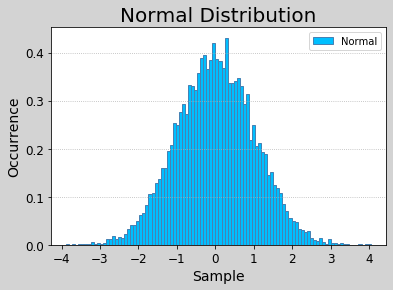

In [36]:
# 案例：生成10000个服从正态分布的随机数并绘制随机值的频数直方图。

samples = np.random.normal(size=10000)
plt.figure('Normal Distribution',facecolor='lightgray')
plt.title('Normal Distribution', fontsize=20)
plt.xlabel('Sample', fontsize=14)
plt.ylabel('Occurrence', fontsize=14)
plt.tick_params(labelsize=12)
plt.grid(axis='y', linestyle=':')
plt.hist(samples, 100, normed=True,
               edgecolor='steelblue',
               facecolor='deepskyblue',
               label='Normal')[1]
plt.legend()
plt.show()

# 杂项功能 #
----

# 排序 #

## 联合间接排序 

联合间接排序支持为待排序列排序，若待排序列值相同，则利用参考序列作为参考继续排序。最终返回排序过后的有序索引序列。
```
indices = numpy.lexsort((次排序序列，主序列序列))
```

In [44]:
# 先按价格排序，在按销售量排序
prices = np.array([92,83,71,92,40,12,64])
volumes = np.array([100,251,4,12,709,34,75])

names =np.array(["Product1","Product2","Product3","Product4","Product5","Product6","Product7"])
# sort
index = np.lexsort((-volumes,prices))# 添加符号，按照销量倒叙排列
print(index)
print(names[index])


[5 4 6 2 1 0 3]
['Product6' 'Product5' 'Product7' 'Product3' 'Product2' 'Product1'
 'Product4']


## 复数数组排序

按照实部的升序排列，对于实部相同的元素，参考虚部的升序，直接返回排序后的结果数组。

```python
numpy.sort_complex(复数数组)

```

## 插入排序

若有需求需要向有序数组中插入元素，使数组依然有序，numpy提供了searchsorted方法查询并返回可插入位置数组。

```python
index = numpy.searchsorted(有序数组, 待插入数据数组)

```

调用numpy提供了insert方法将待插入元素数组中的元素，按照位置数组中的位置，插入到目标数组中，返回结果数组。

```python
numpy.insert(A, index, B) # 向A数组中的indices位置插入B数组中的元素

```

In [49]:
a = np.array([1,3,4,5,7,9])
b = np.array([6,8])
index = np.searchsorted(a,b)
print("index",index)
print("np.insert(a,index,b)=>",np.insert(a,index,b))
print("a",a)

index [4 5]
np.insert(a,index,b) [1 3 4 5 6 7 8 9]
a [1 3 4 5 7 9]


## 插值

需求：统计各小区彩民买彩票的情况：

| 彩民数量 | 彩票购买量 |
| -------- | ---------- |
| 30       | 100注      |
| 40       | 120注      |
| 50       | 135注      |
| 60       | 155注      |
| 45       | -          |
| 65       | 170注      |

scipy提供了常见的插值算法可以通过一组散点得到一个符合一定规律插值器函数。若我们给插值器函数更多的散点x坐标序列，该函数将会返回相应的y坐标序列。

```python
func = si.interp1d(
    离散水平坐标, 
    离散垂直坐标,
    kind=插值算法(缺省为线性插值)
)

```

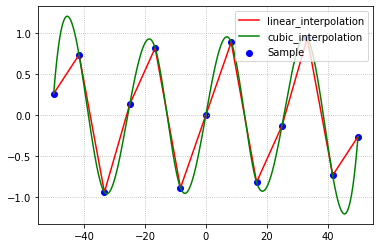

In [64]:
import scipy.interpolate as si

# 一组散点
min_x = -50
max_x = 50
x = np.linspace(min_x,max_x,13)
plt.grid(linestyle=":")
y = np.sin(x)
plt.scatter(x,y,marker="o",color="blue",label="Sample")

# 生成插值器函数
linear = si.interp1d(x,y,kind="linear")
linear_x = np.linspace(min_x,max_x,1000)
linear_y = linear(linear_x)
plt.plot(linear_x,linear_y,color="red",label="linear_interpolation")

# 三次样条插值器
cubic = si.interp1d(x,y,kind="cubic")
cubic_x = np.linspace(min_x,max_x,1000)
cubic_y = cubic(cubic_x)
plt.plot(cubic_x,cubic_y,color="green",label="cubic_interpolation")

plt.legend()
plt.show()

## 积分 ##

206.6680000000001
(206.66666666666669, 2.294460917558657e-12)


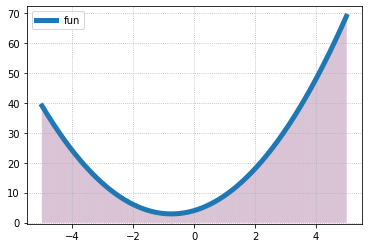

In [92]:
import scipy.integrate as si
# 求定积分
def fun(x):
    return 2 * x ** 2 + 3 * x + 4

a,b = -5,5
x = np.linspace(a,b,1000)
y = fun(x)
plt.plot(x,y,label="fun",linewidth=5)
#plt.fill_between(x,y,0,0 < y,alpha=0.3,color="gray")

# 微元法求积分
n = 500
px = np.linspace(a,b,n+1)
py = fun(px)
area = 0
# 遍历n个梯形，求每个梯形的面积
for i in range(n):
    area += ((py[i+1] + py[i]) * (px[i+1] - px[i])) / 2
print(area)

# API计算 scipy.integrate as si
# 利用quad求积分 给出函数f，积分下限与积分上限[a, b]  返回(积分值，最大误差)
AREA = si.quad(fun,a,b)
print(AREA)

import matplotlib.patches as pat

for i in range(n):
    plt.gca().add_patch(pat.Polygon([
        [px[i], 0], [px[i], py[i]],
        [px[i + 1], py[i + 1]], [px[i + 1], 0]],
        fc='deepskyblue', ec='pink',alpha=0.5))

plt.grid(linestyle=":")
plt.legend()
plt.show()

## 图像 ##

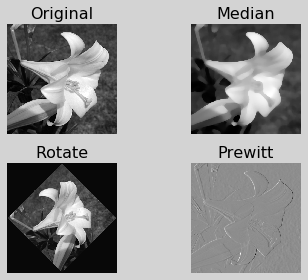

In [100]:
import scipy.ndimage as sn
import imageio 
import numpy as np
import matplotlib.pyplot as mp
#读取文件
original = imageio.imread("/home/ygs/machinelearning/AI/AI/data_note/素材/da_data/lily.jpg",as_gray=True)
#高斯模糊
median = sn.median_filter(original, 21)
#角度旋转
rotate = sn.rotate(original, 45)
#边缘识别
prewitt = sn.prewitt(original)
mp.figure('Image', facecolor='lightgray')

mp.subplot(221)
mp.title('Original', fontsize=16)
mp.axis('off')
mp.imshow(original, cmap='gray')
mp.subplot(222)
mp.title('Median', fontsize=16)
mp.axis('off')
mp.imshow(median, cmap='gray')
mp.subplot(223)
mp.title('Rotate', fontsize=16)
mp.axis('off')
mp.imshow(rotate, cmap='gray')
mp.subplot(224)
mp.title('Prewitt', fontsize=16)
mp.axis('off')
mp.imshow(prewitt, cmap='gray')
mp.tight_layout()
mp.show()


## 金融相关 ##

In [103]:
# 终值 = np.fv(利率, 期数, 每期支付, 现值)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计多少钱？
fv = np.fv(0.01, 5, -100, -1000)
print(round(fv, 2))
# 现值 = np.pv(利率, 期数, 每期支付, 终值)
# 将多少钱以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计fv元？
pv = np.pv(0.01, 5, -100, fv)
print(pv)
# 净现值 = np.npv(利率, 现金流)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 相当于一次性存入多少钱？
npv = np.npv(0.01, [
    -1000, -100, -100, -100, -100, -100])
print(round(npv, 2))
fv = np.fv(0.01, 5, 0, npv)
print(round(fv, 2))
# 内部收益率 = np.irr(现金流)
# 将1000元存入银行5年，以后逐年提现100元、200元、
# 300元、400元、500元，银行利率达到多少，可在最后
# 一次提现后偿清全部本息，即净现值为0元？
irr = np.irr([-1000, 100, 200, 300, 400, 500])
print(round(irr, 2))
npv = np.npv(irr, [-1000, 100, 200, 300, 400, 500])
print(npv)
# 每期支付 = np.pmt(利率, 期数, 现值)
# 以1%的年利率从银行贷款1000元，分5年还清，
# 平均每年还多少钱？
pmt = np.pmt(0.01, 5, 1000)
print(round(pmt, 2))
# 期数 = np.nper(利率, 每期支付, 现值)
# 以1%的年利率从银行贷款1000元，平均每年还pmt元，
# 多少年还清？
nper = np.nper(0.01, pmt, 1000)
print(int(nper))
# 利率 = np.rate(期数, 每期支付, 现值, 终值)
# 从银行贷款1000元，平均每年还pmt元，nper年还清，
# 年利率多少？
rate = np.rate(nper, pmt, 1000, 0)
print(round(rate, 2))

1561.11
-1000.0
-1485.34
1561.11
0.12
0.0
-206.04
5
0.01
